In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
from matplotlib import cm
import csv

from mpl_toolkits.mplot3d import Axes3D

# demo数据

In [13]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]
# y_data = b + w * x_data

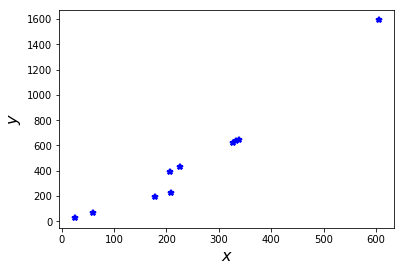

In [14]:
plt.plot(x_data, y_data, '*', ms=6, markeredgewidth=2, color='blue')
# plt.xlim(-200,-100)
# plt.ylim(-5,5)
plt.xlabel(r'$x$', fontsize=16)  # latex写法
plt.ylabel(r'$y$', fontsize=16)
plt.show()

# loss数据 

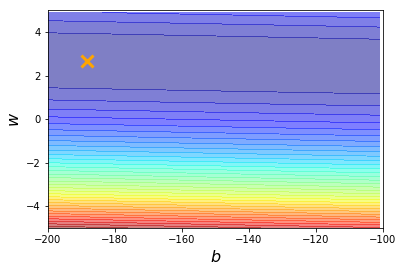

In [15]:
x = np.arange(-200,-100,1) # bias
y = np.arange(-5,5,0.1)    # weight
Z =  np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)
        
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

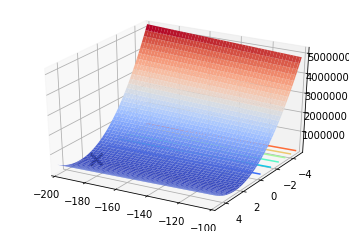

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(x, y)

plt.plot([-188.4], [2.67], [300000], 'x', ms=12, markeredgewidth=3, color='black')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.contour(X, Y, Z, zdir = 'z', offset = -2, cmap = plt.get_cmap('rainbow'))
plt.xlim(-200,-100)
plt.ylim(5,-5)
plt.show()

# 最小二乘法

## 矩阵解法

In [6]:
x_data1 = [ [338., 1],  [333., 1],  [328., 1], [207., 1] , [226., 1]  , [25., 1] , [179., 1] ,  [60., 1] , [208., 1],  [606., 1]]
y_data1 = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

x_m = np.matrix(x_data1).reshape(-1, 2)
y_m = np.matrix(y_data1).reshape(-1, 1)

w = (x_m.T*x_m).I*x_m.T*y_m
# print(w)

w_leastSquare = w[0, 0]
b_leastSquere = w[1, 0]

print('模型参数：', w_leastSquare, b_leastSquere)

模型参数： 2.669454966762257 -188.43319665732685


## 常规公式

In [7]:
y_avg = np.mean(y_data)
x_avg = np.mean(x_data)
xy_avg = np.mean(np.multiply(x_data, y_data))
x2_avg = np.mean(np.multiply(x_data, x_data))

w = (xy_avg - x_avg*y_avg) / (x2_avg - x_avg*x_avg)
b = y_avg - x_avg*w

print('模型参数：', w, b)

模型参数： 2.6694549667622574 -188.43319665732656


## scipy.leastsq

In [8]:
from scipy.optimize import leastsq  ##引入最小二乘法算法

Xi=np.array(x_data)
Yi=np.array(y_data)

##需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

'''
    主要部分：附带部分说明
    1.leastsq函数的返回值tuple，第一个元素是求解结果，第二个是求解的代价值(个人理解)
    2.官网的原话（第二个值）：Value of the cost function at the solution
    3.实例：Para=>(array([ 0.61349535,  1.79409255]), 3)
    4.返回值元组中第一个值的数量跟需要求解的参数的数量一致
'''

#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
p0=[1,20]

#把error函数中除了p0以外的参数打包到args中(使用要求)
Para=leastsq(error,p0,args=(Xi,Yi))

k,b=Para[0]
print("k=",k,"b=",b)
print("cost："+str(Para[1]))
print("求解的拟合直线为:", "y="+str(round(k,2))+"x+"+str(round(b,2)))

k= 2.6694549707405884 b= -188.43319765588762
cost：2
求解的拟合直线为: y=2.67x+-188.43


## sklearn.LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

xs=np.array(x_data).reshape(-1, 1)
ys=np.array(y_data).reshape(-1, 1)

model = LinearRegression()
model.fit(xs, ys)

print('模型参数：', model.coef_, model.intercept_)

模型参数： [[2.66945497]] [-188.43319666]


## least square 画图

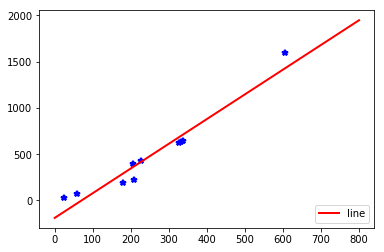

In [10]:
x = np.linspace(0, 800, 100) ##在0-15直接画100个连续点
y = w*x + b ##函数式

plt.plot(x_data, y_data, '*', ms=6, markeredgewidth=2, color='blue')
plt.plot(x,y,color="red",label="line",linewidth=2) 
plt.legend(loc='lower right') #绘制图例
plt.show()

# 梯度下降

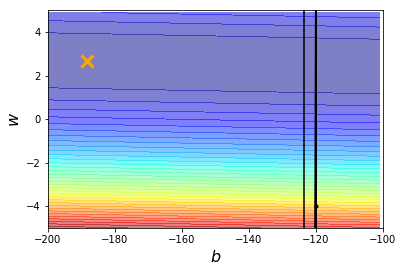

In [19]:
b = -120 # initial b
w = -4 # initial w
lr = 0.00001 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')

plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

w_gradientDecent = w
b_gradientDecent = b

# Adagrad算法

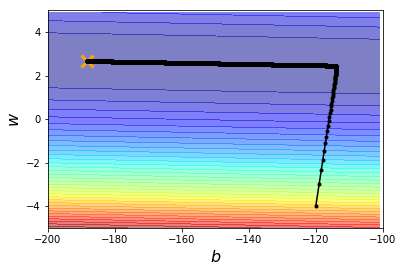

In [20]:
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# for adagrad
b_lr = 0.0
w_lr = 0.0

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # adagrad formular
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters.
    b = b - lr/np.sqrt(b_lr) * b_grad
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')

plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()


w_adaGrad = w
b_adaGrad = b

# 算法求解对比

In [21]:
w_real, b_real = 2.67, -188.4

print('Real Answer: ', w_real, b_real, '\n')
print('Least squares: ', w_leastSquare, b_leastSquere, '\n')
print('Gradient Decent: ', w_gradientDecent, b_gradientDecent, '\n')
print('adagrad Gradient Decent: ', w_adaGrad, b_adaGrad, '\n')

Real Answer:  2.67 -188.4 

Least squares:  2.669454966762257 -188.43319665732685 

Gradient Decent:  nan nan 

adagrad Gradient Decent:  2.6692640713379903 -188.3668387495323 

